# Model baseline

## Data load, extraction, transform

## Data preprocessing

In [ ]:
%run ./5-data_preprocessing.ipynb

We dropped 42448 records.
Done!


# Load the data

In [1]:
import pandas as pd


train_df = pd.read_csv("../data/preprocessed_train_ks_dataset.csv")
test_df  = pd.read_csv("../data/preprocessed_test_ks_dataset.csv")


# Setup the baseline models

# Hypothesis and choose the set of features

In [ ]:
# If the folowwing package is not already installed please install.
!pip install pycaret

In [2]:
from pycaret.classification import *

In [3]:
# Define the features
new_features = ['state', 'goal_usd', 'campaigns_duration',
                'day_launched', 'month_launched', 'year_launched', 'week_day', 'season',
               'category_0', 'category_1', 'category_2', 'category_3', 'category_4',
               'category_5', 'category_6', 'category_7', 'main_category_0',
               'main_category_1', 'main_category_2', 'main_category_3', 'country_0',
               'country_1', 'country_2', 'country_3', 'country_4']

# set up the ML classification experiment
# we set some useful parameters: remove outliers, remove_multicolinearity, normalize the data,
# We can tune many other parameters such: the imputation of missing values, but we have alrady done that while preprocessing the data 
classification = setup(data= train_df[new_features], target='state',
                             remove_outliers=True,
                             normalize=True,
                             normalize_method='robust',
                             remove_multicollinearity=True,)

,Description,Value
0,Session id,5808
1,Target,state
2,Target type,Binary
3,Original data shape,"(269152, 25)"
4,Transformed data shape,"(259731, 25)"
5,Transformed train set shape,"(178985, 25)"
6,Transformed test set shape,"(80746, 25)"
7,Numeric features,24
8,Preprocess,True
9,Imputation type,simple


# Models Comparison

In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.7321,0.8172,0.7009,0.7475,0.7234,0.4641,0.4650,7.4580
lightgbm,Light Gradient Boosting Machine,0.7286,0.8140,0.6933,0.7461,0.7187,0.4573,0.4585,11.8090
rf,Random Forest Classifier,0.7193,0.7983,0.6838,0.7361,0.7090,0.4386,0.4397,22.5560
gbc,Gradient Boosting Classifier,0.7076,0.7840,0.7017,0.7101,0.7059,0.4152,0.4153,21.3990
et,Extra Trees Classifier,0.6978,0.7687,0.6627,0.7128,0.6868,0.3956,0.3966,24.0340
ada,Ada Boost Classifier,0.6826,0.7519,0.6965,0.6776,0.6869,0.3651,0.3653,9.8570
knn,K Neighbors Classifier,0.6781,0.7417,0.6502,0.6887,0.6689,0.3563,0.3568,28.5710
lr,Logistic Regression,0.6628,0.7241,0.6750,0.6590,0.6669,0.3257,0.3258,7.1470
ridge,Ridge Classifier,0.6549,0.0000,0.6592,0.6535,0.6564,0.3097,0.3098,5.8880
lda,Linear Discriminant Analysis,0.6549,0.7116,0.6592,0.6535,0.6564,0.3097,0.3098,6.3310


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='binary:logistic', ...)

### Conclusion

# Create model for each top 3 models

In [6]:
xgboost = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7342,0.8176,0.7042,0.7493,0.7260,0.4685,0.4694
1,0.7333,0.8157,0.7059,0.7469,0.7258,0.4666,0.4673
2,0.7304,0.8150,0.7033,0.7436,0.7229,0.4608,0.4614
3,0.7285,0.8137,0.6984,0.7431,0.7201,0.4570,0.4579
4,0.7286,0.8134,0.6959,0.7445,0.7194,0.4571,0.4581
5,0.7344,0.8189,0.6970,0.7532,0.7240,0.4687,0.4700
6,0.7302,0.8151,0.6998,0.7451,0.7217,0.4604,0.4613
7,0.7300,0.8155,0.7061,0.7416,0.7234,0.4600,0.4605
8,0.7327,0.8182,0.6947,0.7518,0.7221,0.4654,0.4667


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [11]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7312,0.8151,0.6961,0.7487,0.7215,0.4625,0.4636
1,0.7304,0.8133,0.6946,0.7481,0.7204,0.4608,0.4619
2,0.7257,0.8109,0.6946,0.7406,0.7169,0.4513,0.4522
3,0.7327,0.8184,0.6947,0.7518,0.7221,0.4654,0.4668
4,0.7283,0.8117,0.6936,0.7452,0.7185,0.4565,0.4576
5,0.7270,0.8087,0.6936,0.7433,0.7176,0.4541,0.4551
6,0.7260,0.8109,0.6970,0.7398,0.7178,0.4519,0.4527
7,0.7280,0.8131,0.6921,0.7456,0.7179,0.4559,0.4571
8,0.7291,0.8130,0.6920,0.7475,0.7187,0.4583,0.4595


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7230,0.8034,0.6921,0.7377,0.7142,0.4460,0.4469
1,0.7198,0.7952,0.6899,0.7338,0.7112,0.4396,0.4404
2,0.7164,0.7950,0.6742,0.7363,0.7039,0.4327,0.4343
3,0.7182,0.7950,0.6776,0.7375,0.7063,0.4364,0.4379
4,0.7207,0.8006,0.6892,0.7355,0.7116,0.4413,0.4422
5,0.7242,0.8009,0.6860,0.7428,0.7132,0.4484,0.4498
6,0.7163,0.7957,0.6719,0.7374,0.7031,0.4326,0.4343
7,0.7180,0.7995,0.6848,0.7335,0.7083,0.4360,0.4370
8,0.7191,0.7956,0.6859,0.7346,0.7094,0.4381,0.4391


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

## Save the models

In [1]:
save_model(lightgbm, model_name='drive/MyDrive/Colab Notebooks/newforma/lightgbm')
save_model(rf, model_name='drive/MyDrive/Colab Notebooks/newforma/rf')
save_model(xgboost, model_name='drive/MyDrive/Colab Notebooks/newforma/xgboost')

# Merging the top 3 models

In [11]:
blended_model = blend_models(estimator_list=[xgboost,lightgbm, rf])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7345,0.8203,0.6992,0.7524,0.7248,0.4690,0.4702
1,0.7320,0.8157,0.6915,0.7524,0.7207,0.4639,0.4655
2,0.7313,0.8186,0.6858,0.7545,0.7185,0.4627,0.4646
3,0.7342,0.8190,0.6952,0.7540,0.7234,0.4684,0.4698
4,0.7327,0.8130,0.6947,0.7518,0.7221,0.4654,0.4668
5,0.7332,0.8196,0.6982,0.7507,0.7235,0.4664,0.4675
6,0.7365,0.8222,0.7005,0.7548,0.7266,0.4729,0.4742
7,0.7374,0.8236,0.6997,0.7568,0.7271,0.4748,0.4762
8,0.7365,0.8232,0.7047,0.7525,0.7278,0.4729,0.4739


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

# Confusion Matrix

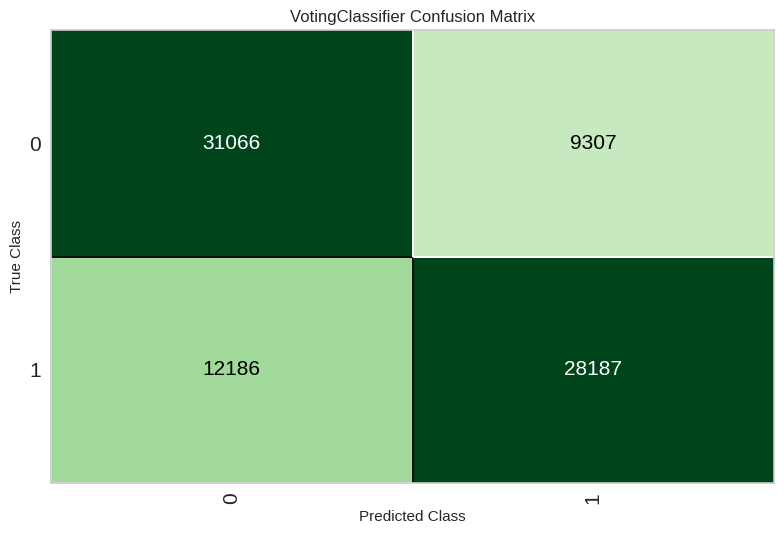

In [ ]:
plot_model(estimator = blended_model, plot = 'confusion_matrix')

# ROC curve

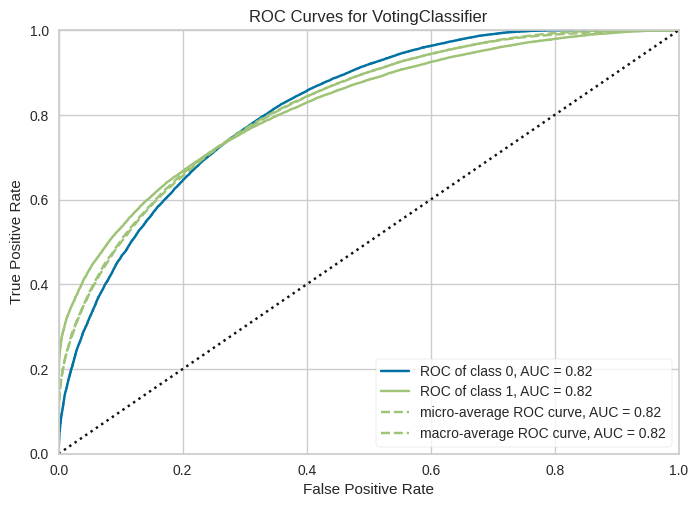

In [ ]:
plot_model(estimator = blended_model, plot = 'auc')

# Features importance

In [ ]:
# Feature Importance is not supported for this specific blended model. I assume that it is because of the exstence of xgboost model
# plot_model(estimator = blended_model, plot = 'feature')

# Evaluate the blended model

In [ ]:
evaluate_model(blended_model)

<Figure size 800x550 with 0 Axes>

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Make Prediction

In [ ]:
training_prediction = predict_model(blended_model, data = train_df)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.8382,0.9221,0.8065,0.8611,0.8329,0.6764,0.6777


In [ ]:
testing_prediction = predict_model(blended_model, data = test_df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.7362,0.8198,0.6992,0.7551,0.7261,0.4725,0.4738


In [ ]:
accuracy_blended_model = ((testing_prediction['prediction_label'] == testing_prediction['state']).sum()/testing_prediction.shape[0])*100

print(f"The accuracy of the blended model using the testing data: {accuracy_blended_model:.2f}%")

The accuracy of the blended model using the testing data: 73.62%


## Conclusion

## Save the blended model

In [13]:
save_model(blended_model, model_name='drive/MyDrive/Colab Notebooks/newforma/blended_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['goal_usd', 'campaigns_duration',
                                              'day_launched', 'month_launched',
                                              'year_launched', 'week_day',
                                              'season', 'category_0',
                                              'category_1', 'category_2',
                                              'category_3', 'category_4',
                                              'category_5', 'category_6',
                                              'category_7', 'main_category_0',
                                              'main_category_1',
                                              'ma...
                                                                       criterion='gini',
                                                         

# Tune my blended model

In [15]:
tuned_blended_model = tune_model(blended_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7347,0.8209,0.7005,0.7519,0.7253,0.4694,0.4705
1,0.7323,0.8161,0.6933,0.7519,0.7214,0.4646,0.4660
2,0.7311,0.8188,0.6859,0.7540,0.7184,0.4621,0.4640
3,0.7343,0.8191,0.6978,0.7527,0.7242,0.4686,0.4699
4,0.7319,0.8131,0.6948,0.7505,0.7216,0.4638,0.4651
5,0.7340,0.8199,0.6994,0.7514,0.7244,0.4680,0.4691
6,0.7344,0.8221,0.6988,0.7524,0.7246,0.4689,0.4701
7,0.7376,0.8240,0.7005,0.7567,0.7275,0.4753,0.4766
8,0.7368,0.8233,0.7051,0.7529,0.7282,0.4737,0.4746


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


## Save the tuned blended model

In [17]:
save_model(tuned_blended_model, model_name='drive/MyDrive/Colab Notebooks/newforma/tuned_blended_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['goal_usd', 'campaigns_duration',
                                              'day_launched', 'month_launched',
                                              'year_launched', 'week_day',
                                              'season', 'category_0',
                                              'category_1', 'category_2',
                                              'category_3', 'category_4',
                                              'category_5', 'category_6',
                                              'category_7', 'main_category_0',
                                              'main_category_1',
                                              'ma...
                                                                       criterion='gini',
                                                         

# Confusion matrix of the tuned blended model

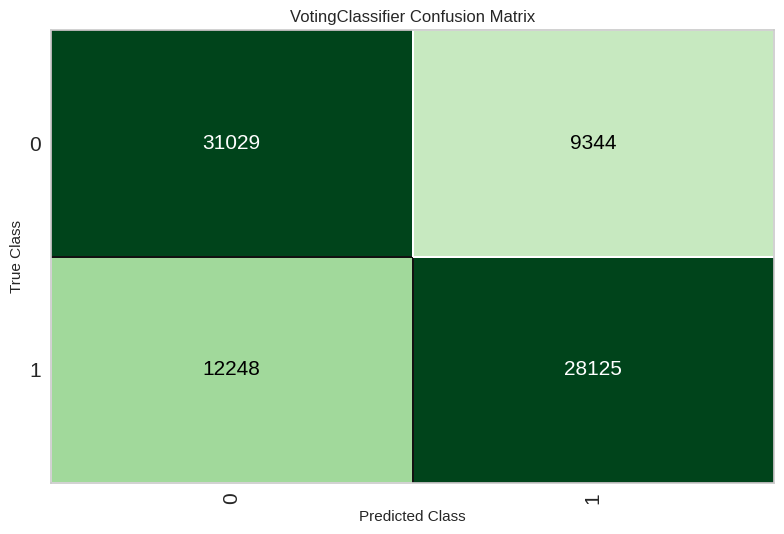

In [ ]:
plot_model(estimator = tuned_blended_model, plot = 'confusion_matrix')

# ROC curve of the tuned blended model

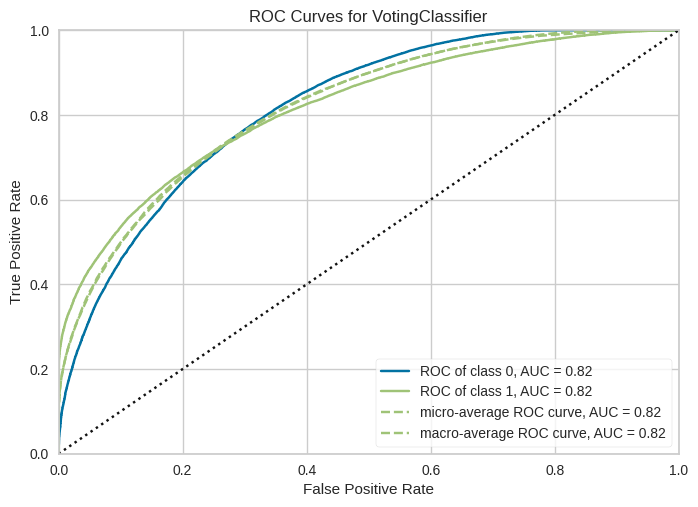

In [ ]:
plot_model(estimator = tuned_blended_model, plot = 'auc')

# Evaluate Tuned Model And Make Prediction


In [ ]:
evaluate_model(tuned_blended_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
training_prediction_tuned_blended_model = predict_model(tuned_blended_model, data = train_df)
testing_prediction_tuned_blended_model = predict_model(tuned_blended_model, data = test_df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.8386,0.9222,0.8082,0.8604,0.8335,0.6771,0.6784


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.7345,0.8193,0.6968,0.7535,0.7241,0.4689,0.4703


In [ ]:
accuracy_tuned_blended_model = ((testing_prediction_tuned_blended_model['prediction_label'] == testing_prediction_tuned_blended_model['state']).sum()/testing_prediction_tuned_blended_model.shape[0])*100


print(f"The accuracy of the tuned blended model using the testing data: {accuracy_tuned_blended_model:.2f}%")


The accuracy of the tuned blended model using the testing data: 73.45%


# Save the best model

In [ ]:
save_model(tuned_blended_model, model_name='kickstarter_success_prediction')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['goal_usd', 'campaigns_duration',
                                              'day_launched', 'month_launched',
                                              'year_launched', 'week_day',
                                              'season', 'category_0',
                                              'category_1', 'category_2',
                                              'category_3', 'category_4',
                                              'category_5', 'category_6',
                                              'category_7', 'main_category_0',
                                              'main_category_1',
                                              'ma...
                                                                       criterion='gini',
                                                         

# Load the model

In [ ]:
kickstarter_success_prediction = load_model('../models/kickstarter_success_prediction')

Transformation Pipeline and Model Successfully Loaded
